<Axes: title={'center': 'Feature Importance'}>

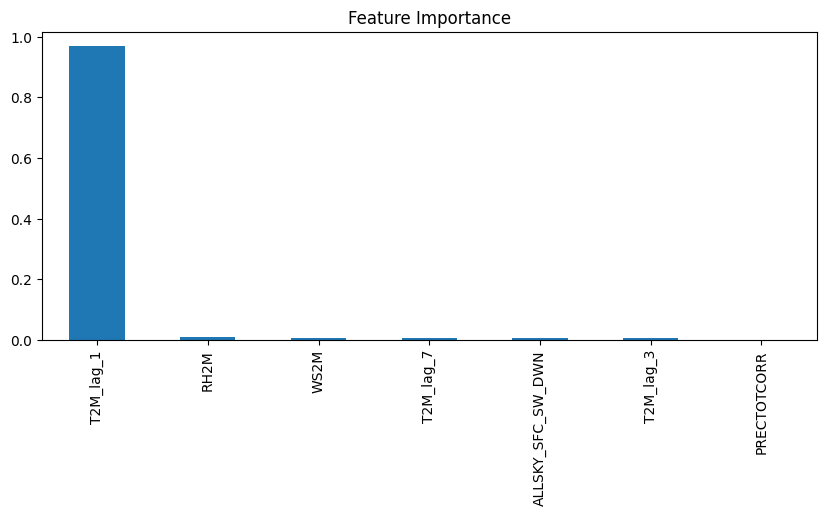

In [7]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,4), title="Feature Importance")


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1.0250807560137454
RMSE: 1.3846624646449264


In [4]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split

X = df_model.drop(columns=["T2M"])
y = df_model["T2M"]

# Time-series safe split
split_index = int(len(df_model) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 4.3 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 4.1 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/8.0 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 4.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 3.9 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - --------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Create lag features (previous days influence future)
for lag in [1, 3, 7]:
    df[f"T2M_lag_{lag}"] = df["T2M"].shift(lag)

# Drop missing rows
df_model = df.dropna()

df_model.head()


,T2M,RH2M,PRECTOTCORR,WS2M,ALLSKY_SFC_SW_DWN,T2M_lag_1,T2M_lag_3,T2M_lag_7
2020-01-08,14.87,37.37,0.00,3.35,14.54,12.23,14.67,16.41
2020-01-09,15.85,39.27,0.06,2.49,12.60,14.87,11.15,18.06
2020-01-10,12.97,47.33,0.00,2.51,17.39,15.85,12.23,20.78
2020-01-11,10.80,40.98,0.00,4.61,16.22,12.97,14.87,21.55
2020-01-12,9.00,44.48,0.00,3.49,16.84,10.80,15.85,14.67


In [1]:
import pandas as pd

df = pd.read_csv("../data/riyadh_climate.csv", index_col=0, parse_dates=True)

df.head(), df.describe()


(              T2M   RH2M  PRECTOTCORR  WS2M  ALLSKY_SFC_SW_DWN
 2020-01-01  16.41  38.45         0.00  2.51              13.58
 2020-01-02  18.06  39.85         0.00  4.27              15.53
 2020-01-03  20.78  33.73         0.00  4.93              15.84
 2020-01-04  21.55  37.88         0.00  3.28              15.07
 2020-01-05  14.67  64.41         2.78  2.73               5.42,
                T2M         RH2M  PRECTOTCORR         WS2M  ALLSKY_SFC_SW_DWN
 count  1462.000000  1462.000000  1462.000000  1462.000000        1462.000000
 mean     26.394754    25.914166     0.200889     2.770205          21.932127
 std       8.315235    16.165743     1.416206     0.959284           5.273865
 min       6.300000     6.760000     0.000000     0.840000           3.720000
 25%      19.157500    13.850000     0.000000     2.040000          17.805000
 50%      27.195000    19.500000     0.000000     2.680000          22.865000
 75%      34.235000    34.805000     0.000000     3.390000          2